In [1]:
import Tests.custom_tests as tests

N, values, weights, W_capacity = tests.random_test(1000)
W_capacity = 1000

In [2]:
''' EXECUTE ONLY FOR SMALL INSTANCES
from exact_solver import Exact_solver

exact_solver = Exact_solver(W_capacity, weights, values, test_annealing=False)

best_feasible_profit, minimum_energy = exact_solver.run()
Brute_force_dict = {"N": exact_solver.N, "W": exact_solver.W, "profit": best_feasible_profit, "energy": minimum_energy, "solver": "Exact"}
'''

### DP

In [ ]:
from dp_solver import DP_solver

dp_solver = DP_solver(W_capacity, weights, values)
items_in_solution = dp_solver.run()
DP_solution_dict = dp_solver.show_solution()
DP_solution_dict['solver'] = 'DP'

-------- Solution has items:  [5, 21, 28, 36, 41, 52, 63, 72, 74, 81, 86, 101, 111, 114, 119, 161, 165, 168, 169, 172, 176, 180, 182, 183, 185, 190, 192, 198, 216, 227, 228, 234, 242, 250, 253, 255, 262, 271, 299, 310, 311, 313, 315, 317, 322, 330, 343, 349, 351, 354, 356, 369, 387, 399, 420, 432, 440, 442, 443, 455, 457, 461, 463, 468, 471, 476, 492, 495, 504, 510, 518, 529, 543, 545, 548, 573, 576, 584, 585, 592, 597, 600, 601, 608, 610, 640, 647, 649, 653, 664, 671, 672, 673, 695, 714, 715, 720, 721, 727, 730, 734, 735, 739, 742, 744, 753, 754, 758, 777, 781, 784, 797, 822, 829, 843, 854, 855, 859, 879, 887, 888, 896, 912, 915, 925, 926, 930, 937, 939, 940, 941, 946, 953, 954, 959, 960, 975, 980, 983, 995, 998] --------
 - Evaluating candidate  [5, 21, 28, 36, 41, 52, 63, 72, 74, 81, 86, 101, 111, 114, 119, 161, 165, 168, 169, 172, 176, 180, 182, 183, 185, 190, 192, 198, 216, 227, 228, 234, 242, 250, 253, 255, 262, 271, 299, 310, 311, 313, 315, 317, 322, 330, 343, 349, 351, 354, 356

### Simulated annealing

In [ ]:
from neal_solver import Neal_annealing_solver

H_solver = Neal_annealing_solver(W_capacity, weights, values)
neal_solution_items = H_solver.run()
Neal_solution_dict = H_solver.show_solution()
Neal_solution_dict['solver'] = 'Neal'

-------- Solution has items:  [5, 21, 28, 36, 41, 52, 63, 72, 74, 81, 86, 101, 111, 114, 119, 161, 165, 168, 169, 172, 176, 180, 182, 183, 185, 190, 192, 198, 211, 216, 227, 228, 234, 242, 250, 253, 255, 262, 271, 278, 299, 310, 311, 313, 315, 317, 322, 330, 343, 349, 351, 354, 356, 369, 387, 399, 420, 432, 440, 442, 443, 455, 457, 461, 463, 468, 471, 476, 492, 495, 504, 510, 518, 529, 543, 545, 548, 573, 576, 584, 585, 592, 597, 600, 601, 608, 610, 611, 640, 647, 649, 653, 664, 668, 671, 672, 673, 695, 714, 715, 720, 721, 730, 734, 735, 739, 742, 744, 753, 754, 758, 777, 781, 784, 797, 822, 829, 843, 854, 855, 859, 879, 887, 888, 896, 912, 915, 925, 926, 930, 937, 939, 941, 946, 953, 954, 960, 975, 980, 983, 995] --------
 - Evaluating candidate  [5, 21, 28, 36, 41, 52, 63, 72, 74, 81, 86, 101, 111, 114, 119, 161, 165, 168, 169, 172, 176, 180, 182, 183, 185, 190, 192, 198, 211, 216, 227, 228, 234, 242, 250, 253, 255, 262, 271, 278, 299, 310, 311, 313, 315, 317, 322, 330, 343, 349, 351

### Store results in a file

In [ ]:
import json

file_path = 'tests/large_instance_solutions.txt'

with open(file_path, 'a') as file:
    # json.dump(Brute_force_dict, file)
    # file.write('\n')
    json.dump(DP_solution_dict, file)
    file.write('\n')
    json.dump(Neal_solution_dict, file)
    file.write('\n')
    file.write('-\n')


### Generate the plots for the results stored

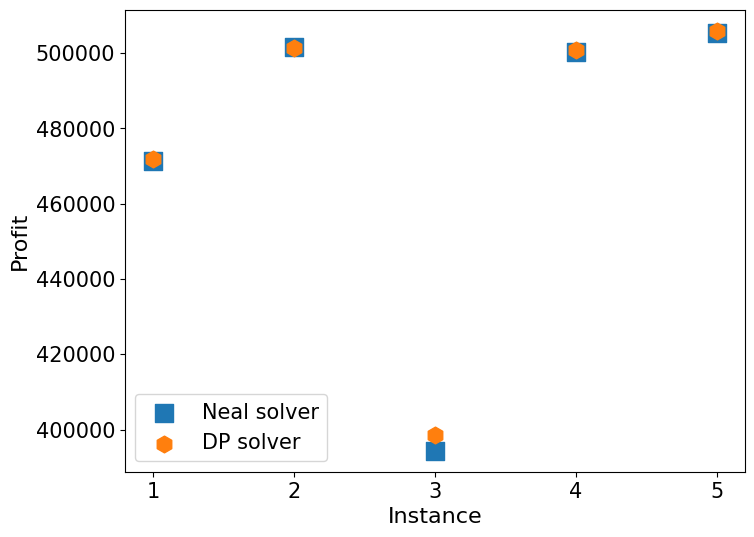

In [1]:
import matplotlib.pyplot as plt
import json

# file_path = 'tests/small_instance_solutions.txt'
file_path = 'tests/large_instance_solutions.txt'


n_instances = 0 # number of instances solved
dictionaries = []
with open(file_path, 'r') as file:
    for line in file:
        if line != '-\n':
            dictionaries.append(json.loads(line))
        else:
            n_instances += 1

DP_profits = [0]*n_instances
Neal_profits = [0]*n_instances
# Brute_force_profits = [0]*n_instances

count = 0
for dict in dictionaries:
    # i = int(count/3)
    i = int(count/2)
    if dict['solver'] == 'DP':
        DP_profits[i] = dict['profit']
    if dict['solver'] == 'Neal':
        Neal_profits[i] = dict['profit']
    '''if dict['solver'] == 'Exact':
        Brute_force_profits[i] = dict['profit']'''
    count += 1


instances = range(1,n_instances+1)
plt.figure(figsize=(8, 6))

# plt.scatter(instances, Brute_force_profits, marker='x', s=400, color='red', label='Brute force')
plt.scatter(instances, Neal_profits, marker='s', s=170, label='Neal solver')
plt.scatter(instances, DP_profits, marker='h', s= 145, label='DP solver')

plt.xticks(instances, fontsize=15)  # Replace x-values with instance names
plt.yticks(fontsize=15) 
plt.xlabel('Instance', fontsize=16)
plt.ylabel('Profit', fontsize=16)
plt.legend(fontsize=15)
plt.grid(False)
plt.show()
